<h1 style='font-size:40px'> Applications</h1>

<h2 style='font-size:30px'> Preferential Attachment Model</h2>

<h3 style='font-size:30px;font-style:italic'> Degree Distributions</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Aprenderemos aqui a obter as distribuições dos degrees de uma rede.
        </li>
    </ul>
</div>

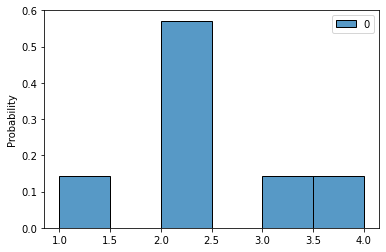

In [13]:
# Para obter os degrees de uma rede bidirecional, use o método 'degree'.
import networkx as nx
import seaborn as sns
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'D'), ('A', 'C'), ('C', 'D'), ('C', 'E'), ('E', 'F'), ('F', 'B'), ('G', 'A')])

# Plotando as distrubuições de probabilidade dos degrees no seaborn.
sns.histplot(dict(G.degree()).values(), stat='probability');

In [14]:
# Obtendo os in degrees de uma rede unidirecional.
G = nx.DiGraph()
G.add_edges_from([('A', 'B'), ('B','A'), ('A', 'C'), ('A', 'D'), ('C', 'E'), ('E', 'C'), ('D', 'B'), ('D', 'E')])

G.in_degree()

InDegreeView({'A': 1, 'B': 2, 'C': 2, 'D': 1, 'E': 2})

<center> 
    <h1> Distribuição de Degrees em Datasets Reais</h1>
    <img src='degree_distribution1.png'>
</center>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Quando aplicamos uma escala logarítmica, a distribuição parece adquirir a forma de uma linha reta. Distribuições dessa natureza tendem a respeitar a chamada <em> Power Law</em>, cuja fórmula é dada na imagem.
        </li>
        <li> 
            Observe que é comum haver pouquíssimos pontos com um degree elevado, enquanto que os demais, de uma maneira geral, apresentam uma baixa estatística.
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Preferential Attachment Model</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            É considerando esse conjunto de características das redes reais que foi criado o Preferential Attachment Model. Ele propõe criar uma rede iterativamente. À cada ciclo, um novo nó deve ser adicionado; a probabilidade de que ele se conecte a qualquer outro ponto da rede é proporcional ao degree atual deste.
        </li>
        <li> 
            Conforme a rede cresce, a distribuição de degrees se aproxima à Power Law.
        </li>
    </ul>
</div>

<AxesSubplot:ylabel='Count'>

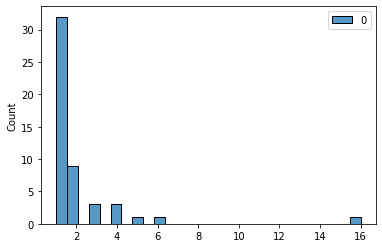

In [49]:
# Criando uma rede a partir do Preferential Attachment Model.
# O parâmetro 'n' sinaliza o número de nós final desejado.
# 'm' indica quantos edges cada novo nó terá.
G = nx.barabasi_albert_graph(50, 1, seed=42)
degrees = dict(G.degree()).values()

# Como é possível enxergar, a maior parte dos pontos tem baixo degree, enquanto um único caso isolado foi capaz de fazer 16 conexões.
sns.histplot(degrees)

<div> 
    <hr>
    <h2 style='font-size:30px'> Small World Networks</h2>
</div>

In [17]:
! mv /Users/felipeveiga/Desktop/Screen\ Shot\ 2022-08-07\ at\ 14.10.33.png ./degree_distribution1.png

<p style='color:red'> Small World Networks